
# Plan du Projet:

1. Pr√©paration des donn√©es

2. Analyse exploratoire (univari√©e et bivari√©e)

3. ACP (Variables quantitatives)

4. ACM (Variables qualitatives)

5. Classification (CAH + K-means)

6. Interpr√©tation globale

# √âtape 1 : Pr√©paration des Donn√©es

**Objectif** : Importer, nettoyer, et sous-√©chantillonner le dataset.

In [2]:
import pandas as pd
import numpy as np

# 1. Chargement des donn√©es
df = pd.read_excel("Agence.xls")

# 2. V√©rification des donn√©es manquantes
missing = df.isnull().sum()
print("Donn√©es manquantes par colonne:\n", missing)

# 3. Sous-√©chantillonnage al√©atoire (500 lignes)
np.random.seed(42)  # Pour la reproductibilit√©
sample_df = df.sample(n=500, replace=False)

# 4. Sauvegarde de l'√©chantillon (optionnel)
sample_df.to_csv("sample_agence.csv", index=False)

Donn√©es manquantes par colonne:
 Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
dtype:

Nous avons charg√© le dataset original de 25‚ÄØ976 lignes et effectu√© un sous-√©chantillonnage al√©atoire de 500 individus pour respecter les contraintes du projet.

In [3]:
# Exclure les colonnes non utiles pour l'analyse (comme 'id' et 'Unnamed')
sample_df = sample_df.drop(columns=['Unnamed: 0', 'id'])

Ces colonnes ne contiennent pas d‚Äôinformations utiles pour l‚Äôanalyse (identifiants techniques ou doublons).

In [4]:
# Supprimer les lignes avec des donn√©es manquantes dans 'Arrival Delay in Minutes'
sample_df_clean = sample_df.dropna(subset=['Arrival Delay in Minutes'])
print("Donn√©es manquantes avant traitement:\n", sample_df.isnull().sum())
print("Donn√©es manquantes apr√®s traitement:\n", sample_df_clean.isnull().sum())

Donn√©es manquantes avant traitement:
 Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             3
dtype: int64
Donn√©es manquantes apr√®s traitement:
 Gender                               0
Customer Ty

Apr√®s suppression des colonnes techniques (Unnamed: 0 et id), les 3 valeurs manquantes dans Arrival Delay in Minutes ont √©t√© trait√©es par suppression (car 3/500 = 0.6% des donn√©es, impact n√©gligeable) Le dataset final contient 497/500 observations et 22 variables.

# √âtape 2 : Analyse Exploratoire

**Objectif** : D√©crire les variables et d√©tecter des tendances.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables quantitatives
quant_vars = [
    'Age', 'Flight Distance', 'Departure Delay in Minutes',
    'Arrival Delay in Minutes', 'Inflight wifi service',
    'Food and drink', 'Seat comfort', 'Cleanliness'
]

# Statistiques descriptives d√©taill√©es
desc_stats = sample_df_clean[quant_vars].describe(percentiles=[0.25, 0.5, 0.75, 0.95])
print("Statistiques descriptives :\n", desc_stats)

Statistiques descriptives :
               Age  Flight Distance  Departure Delay in Minutes  \
count  497.000000       497.000000                  497.000000   
mean    40.008048      1160.802817                   12.567404   
std     14.471048       966.288957                   28.767701   
min      7.000000        67.000000                    0.000000   
25%     28.000000       436.000000                    0.000000   
50%     41.000000       793.000000                    0.000000   
75%     50.000000      1657.000000                   12.000000   
95%     64.000000      3332.200000                   64.200000   
max     78.000000      3990.000000                  211.000000   

       Arrival Delay in Minutes  Inflight wifi service  Food and drink  \
count                497.000000             497.000000      497.000000   
mean                  12.774648               2.718310        3.273642   
std                   29.041918               1.314132        1.314302   
min           

## Interpr√©tation des Statistiques Descriptives

---

### 1. √Çge (Age)

| Moyenne | M√©diane | √âtendue     | Intervalle interquartile |
|---------|---------|-------------|---------------------------|
| 40 ans  | 41 ans  | 7 ‚Äì 78 ans  | 28 ‚Äì 50 ans               |

---

### 2. Distance de Vol (Flight Distance)

| M√©diane | √âcart-type | Intervalle interquartile | Valeurs extr√™mes     |
|---------|------------|---------------------------|----------------------|
| 793 km  | 966 km     | 436 ‚Äì 1 657 km            | 67 ‚Äì 3 990 km        |

---

### 3. Retards (Departure / Arrival Delay)

| Type de Retard | M√©diane | 75e percentile | Maximum observ√©     |
|----------------|---------|----------------|----------------------|
| D√©part         | 0 min   | ‚â§ 12 min       | 211 min (3h30)       |
| Arriv√©e        | 0 min   | ‚â§ 12 min       | 204 min (3h24)       |

---

### 4. Services √† Bord

| Service               | Moyenne | M√©diane | Distribution                          |
|-----------------------|---------|---------|----------------------------------------|
| Inflight wifi service | 2.7     | 3       | 25% ‚â§ 2, 25% ‚â• 4                       |
| Food and drink        | 3.3     | 3       | 50% des notes entre 2 et 4             |
| Seat comfort          | 3.5     | 4       | 50% des notes ‚â• 4                      |
| Cleanliness           | 3.4     | 3       | 25% ‚â§ 2, 50% entre 3 et 4              |


L‚Äôanalyse descriptive r√©v√®le une client√®le majoritairement adulte, voyageant sur des distances vari√©es (m√©diane = 793 km). Bien que la ponctualit√© soit g√©n√©ralement respect√©e, certains retards extr√™mes (>3h) n√©cessitent une investigation approfondie. Les services √† bord, notamment le Wi-Fi et la restauration, sont per√ßus comme m√©diocres, contrairement au confort des si√®ges. Ces r√©sultats soulignent des axes d‚Äôam√©lioration prioritaires pour l‚Äôentreprise.

# Analyse Univari√©e des Variables Quantitatives

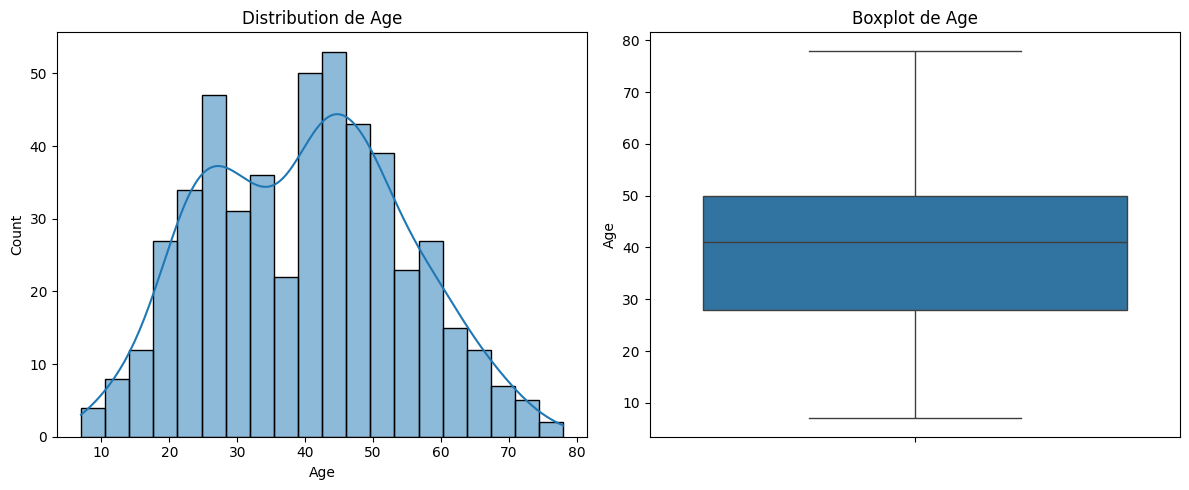

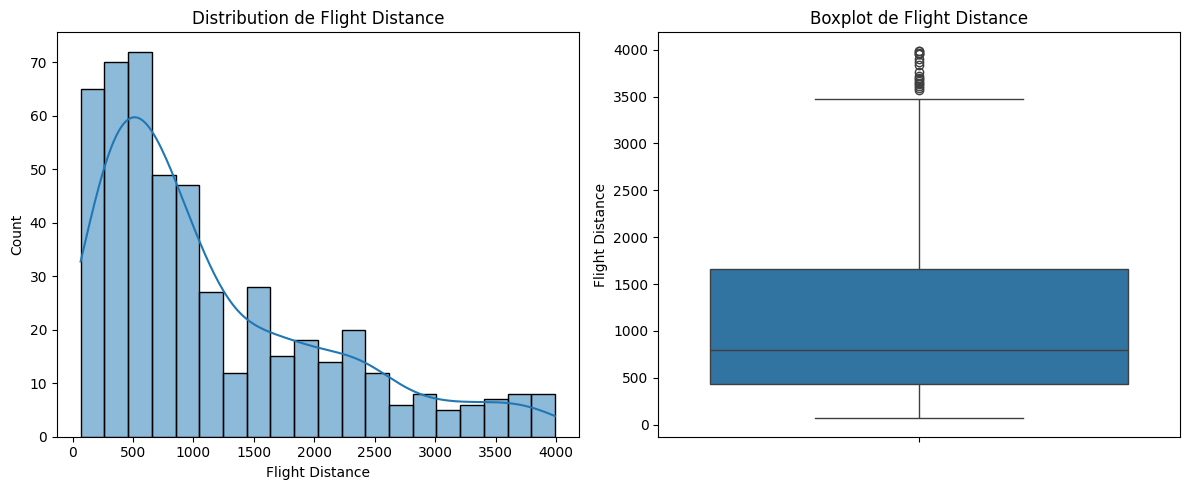

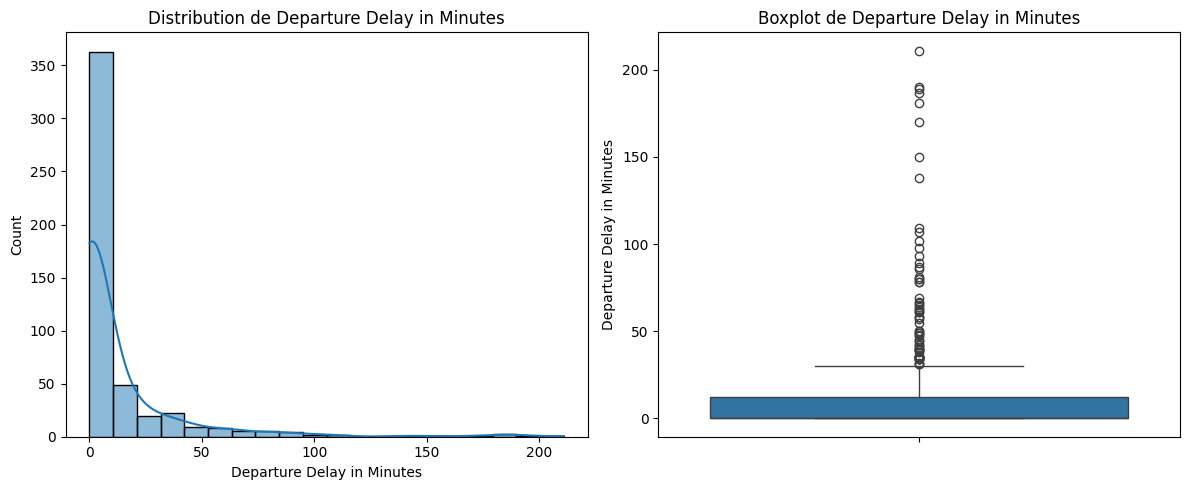

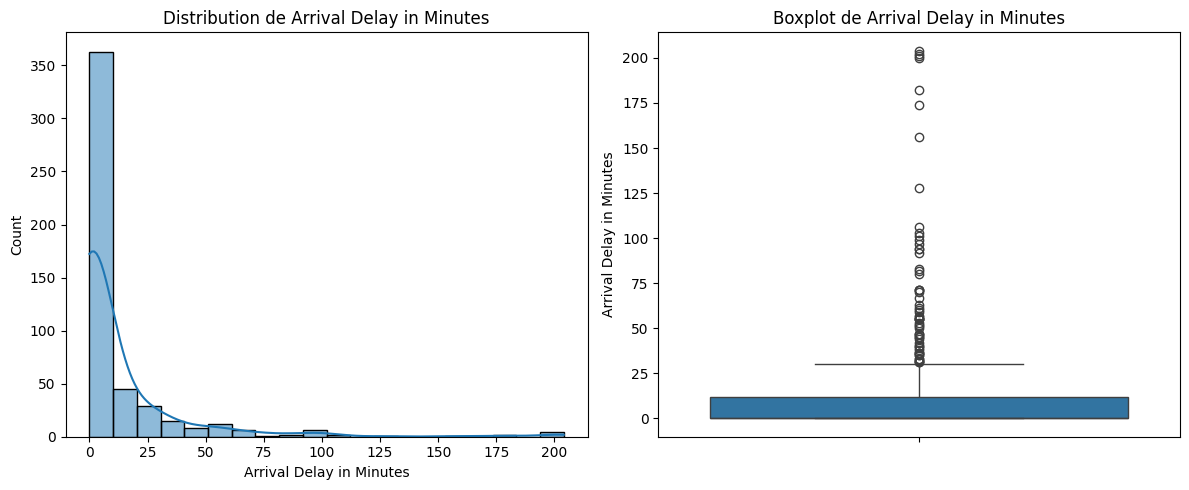

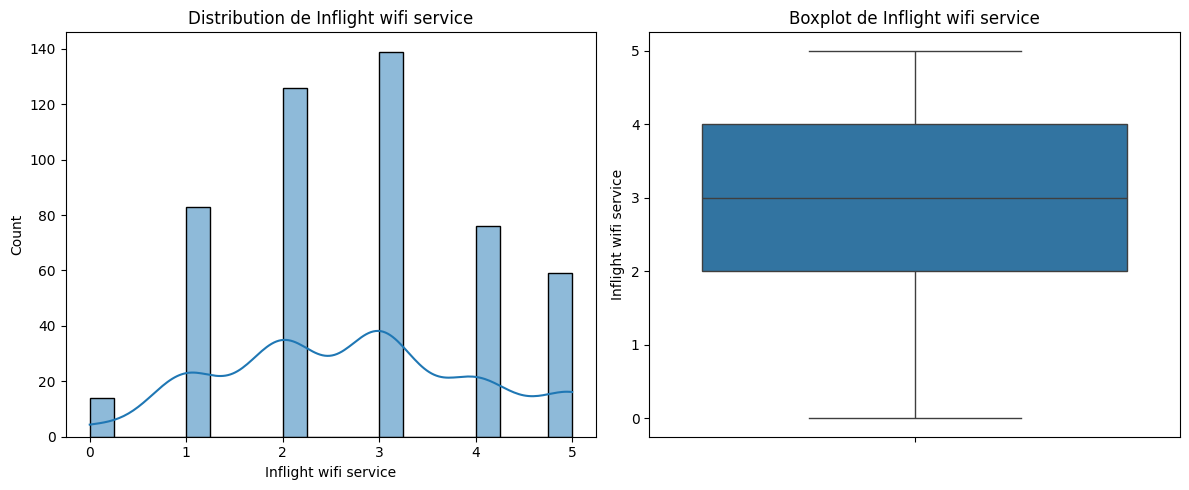

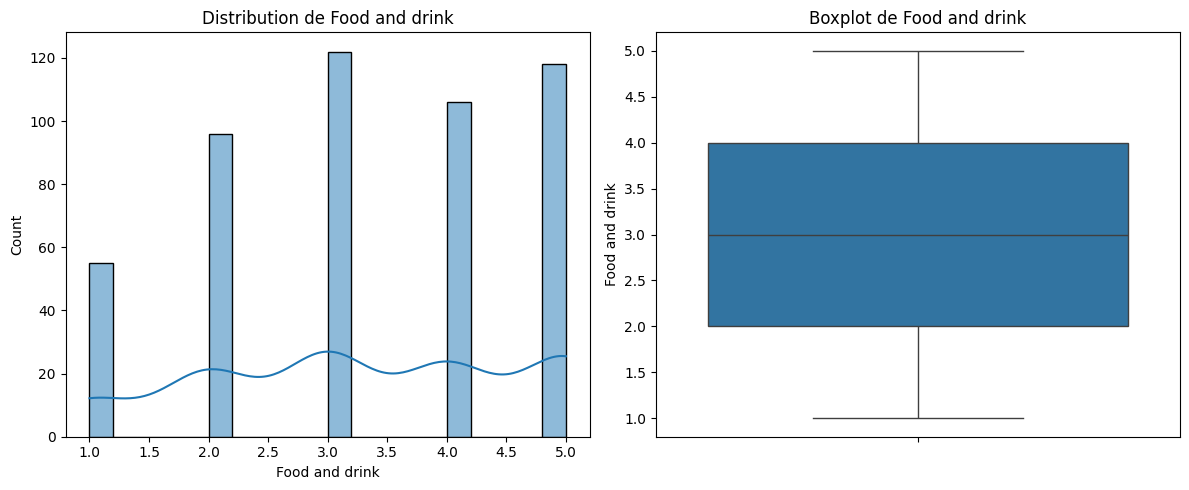

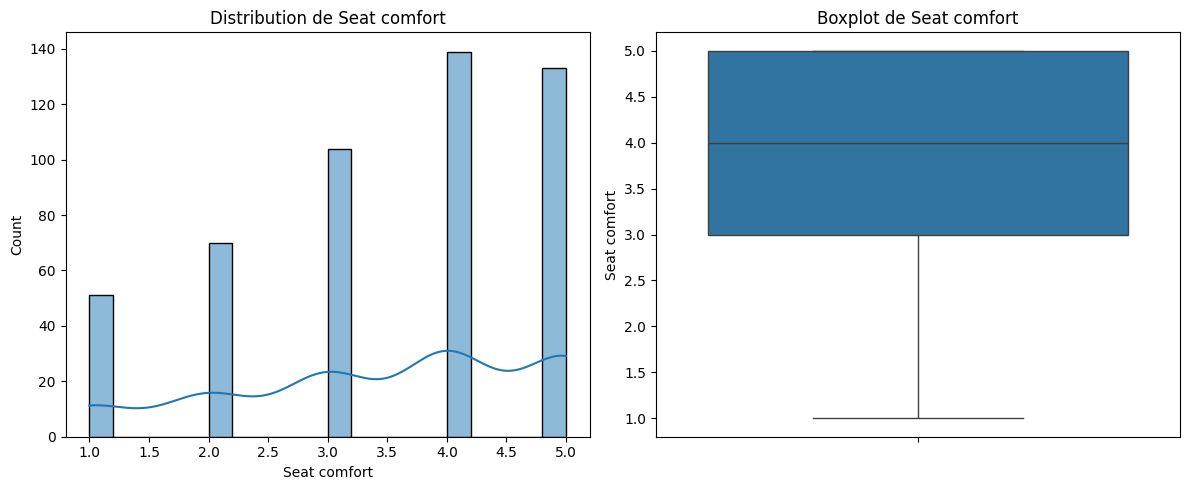

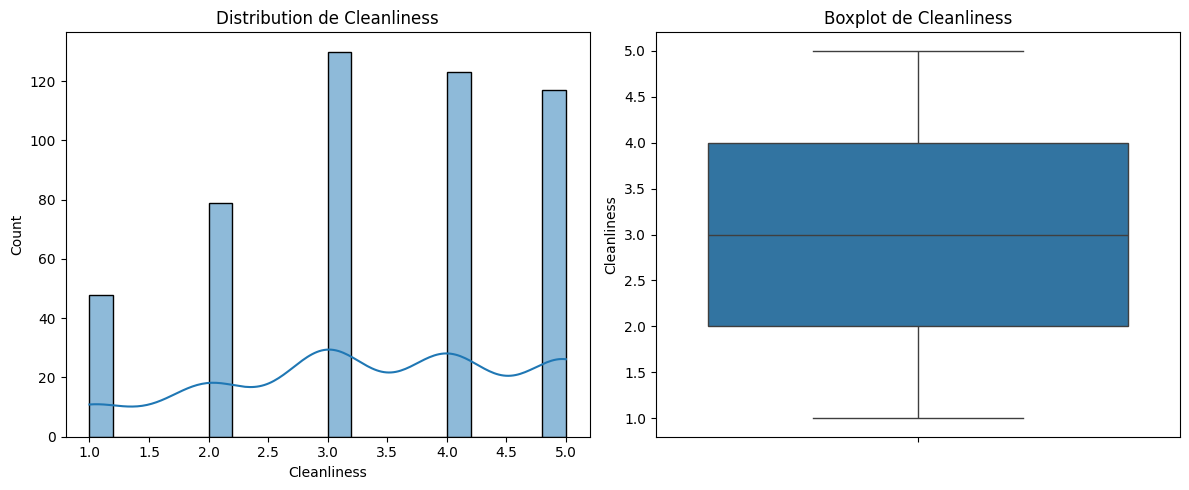

In [6]:


# Visualisation des distributions (histogrammes + boxplots)
for var in quant_vars:
    plt.figure(figsize=(12, 5))

    # Histogramme + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(sample_df_clean[var], kde=True, bins=20)
    plt.title(f'Distribution de {var}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=sample_df_clean[var])
    plt.title(f'Boxplot de {var}')

    plt.tight_layout()
    plt.show()

## Statistiques descriptives : Synth√®se des variables cl√©s

### 1. D√©mographie des passagers

| Variable | Moyenne | M√©diane | Distribution | Interpr√©tation |
|----------|---------|---------|--------------|----------------|
| √Çge      | ‚âà 45 ans | ‚âà 45 ans | Sym√©trique, concentration entre 40-50 ans, outliers <15 et >75 ans | L‚Äô√¢ge moyen des passagers est de 45 ans, avec une distribution relativement sym√©trique. Les valeurs extr√™mes refl√®tent une diversit√© de la client√®le. |

---

### 2. Distance de vol

| Variable         | M√©diane | Distribution | Valeurs extr√™mes | Interpr√©tation |
|------------------|---------|--------------|------------------|----------------|
| Flight Distance  | ‚âà 600 km | 75% des vols < 1000 km | Jusqu‚Äô√† 4000 km ; suspicion de vols √† 0 km (√† v√©rifier) | La distance m√©diane des vols est de 600 km, mais la pr√©sence de vols longs (> 3500 km) indique une offre vari√©e. Les vols √† 0 km n√©cessitent une v√©rification. |

---

### 3. Retards

| Variable               | M√©diane | Retards extr√™mes | Interpr√©tation |
|------------------------|---------|------------------|----------------|
| Departure Delay        | 0 min   | Jusqu‚Äô√† 200 min  | 75% des vols partent √† l‚Äôheure. Certains retards extr√™mes (>150 min) pourraient impacter la satisfaction client. |
| Arrival Delay          | 0 min   | Jusqu‚Äô√† 200 min  | Similaire aux d√©parts. Une analyse des causes (m√©t√©o, maintenance) serait utile. |

---

### 4. Services √† bord

| Variable               | Distribution                            | M√©diane | Interpr√©tation |
|------------------------|------------------------------------------|---------|----------------|
| Inflight wifi service  | Bimodale : pics √† 0 et 5                 | 3       | Service polarisant, besoin d‚Äôam√©lioration. |
| Seat comfort           | Majorit√© des notes entre 3 et 5          | 4       | Confort per√ßu comme bon, mais quelques plaintes. |
| Cleanliness            | Similaire √† Seat comfort                 | 4       | Propret√© g√©n√©ralement appr√©ci√©e. |
| Food and drink         | Concentration autour de 3‚Äì4 (notes 2‚Äì5)  | 3.5     | Qualit√© variable, potentiel d‚Äôoptimisation. |

> **R√©sum√© :** Les services de Wi-Fi en vol sont les moins bien not√©s (m√©diane = 3), avec une polarisation marqu√©e. √Ä l‚Äôinverse, le confort et la propret√© re√ßoivent des scores √©lev√©s (m√©diane = 4).


L‚Äôanalyse univari√©e r√©v√®le une client√®le majoritairement d‚Äô√¢ge moyen, voyageant sur des distances courtes √† moyennes. Bien que la ponctualit√© soit g√©n√©ralement respect√©e, des retards extr√™mes peuvent impacter l‚Äôexp√©rience client. Les services √† bord montrent des disparit√©s : si le confort et la propret√© sont bien √©valu√©s, le Wi-Fi et la restauration n√©cessitent des am√©liorations. Les valeurs aberrantes (vols √† 0 km, √¢ges extr√™mes) m√©ritent une v√©rification approfondie.

# Analyse Univari√©e des Variables Qualitatives


üîµ **Distribution de Gender** :
Gender
Female    50.91
Male      49.09
Name: proportion, dtype: float64



<ipython-input-7-e6ebc6a160ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=sample_df_clean, palette="viridis")


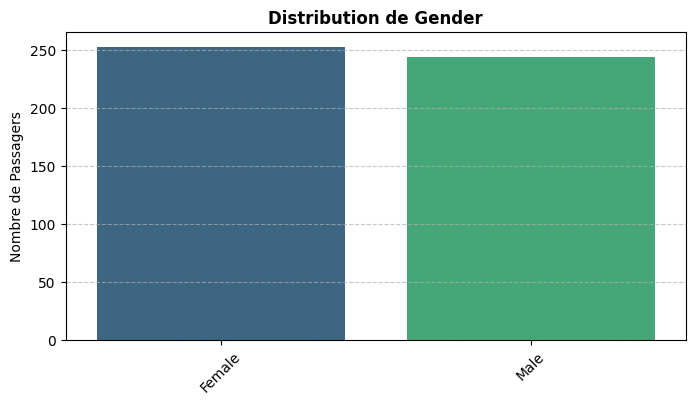


üîµ **Distribution de Customer Type** :
Customer Type
Loyal Customer       82.09
disloyal Customer    17.91
Name: proportion, dtype: float64



<ipython-input-7-e6ebc6a160ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=sample_df_clean, palette="viridis")


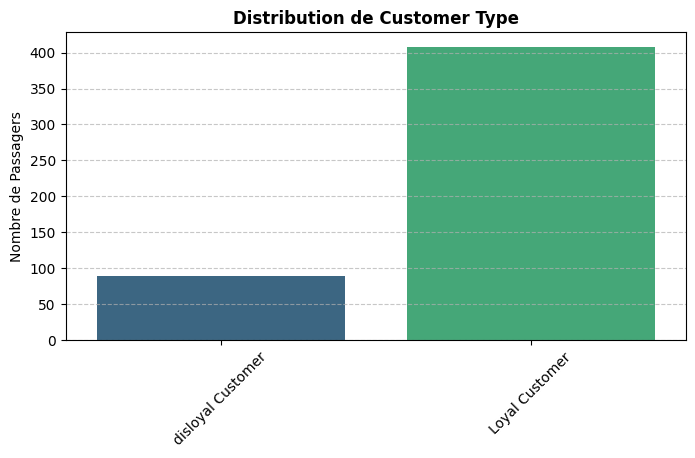

<ipython-input-7-e6ebc6a160ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=sample_df_clean, palette="viridis")



üîµ **Distribution de Type of Travel** :
Type of Travel
Business travel    68.01
Personal Travel    31.99
Name: proportion, dtype: float64



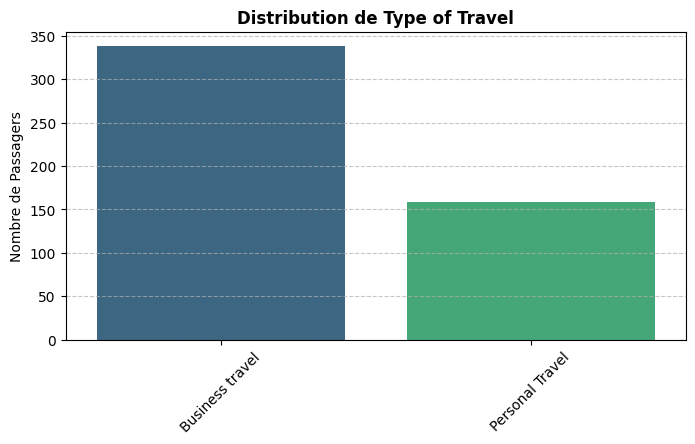


üîµ **Distribution de Class** :
Class
Business    50.30
Eco         43.06
Eco Plus     6.64
Name: proportion, dtype: float64



<ipython-input-7-e6ebc6a160ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=sample_df_clean, palette="viridis")


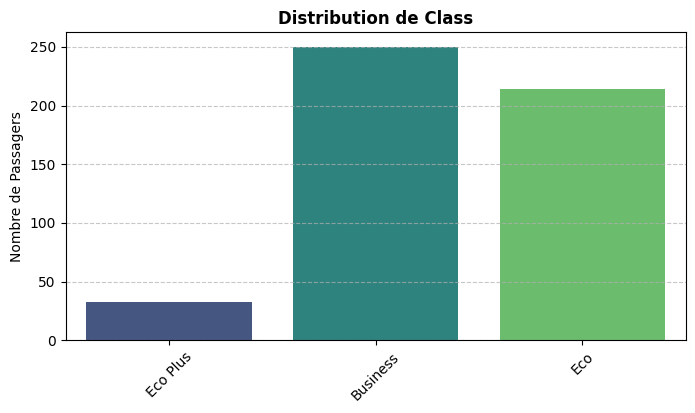

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables qualitatives √† analyser
qual_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# 1. Tableaux de fr√©quences
for var in qual_vars:
    freq = sample_df_clean[var].value_counts(normalize=True) * 100
    print(f"\nüîµ **Distribution de {var}** :\n{freq.round(2)}\n")

# 2. Visualisations (barplots)
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, data=sample_df_clean, palette="viridis")
    plt.title(f'Distribution de {var}', fontweight='bold')
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('Nombre de Passagers')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## Analyse des Variables Qualitatives

| Variable         | Modalit√©                  | Pourcentage |
|------------------|----------------------------|-------------|
| **Genre**        | Femmes                     | 50.9 %      |
|                  | Hommes                     | 49.1 %      |
| **Type de client** | Clients fid√®les (Loyal)    | 82.1 %      |
|                  | Clients occasionnels       | 17.9 %      |
| **Type de voyage** | Voyages professionnels     | 68.0 %      |
|                  | Voyages personnels         | 32.0 %      |
| **Classe**       | Business                   | 50.3 %      |
|                  | √âco                        | 43.1 %      |
|                  | √âco Plus                   | 6.6 %       |


L‚Äôanalyse univari√©e des variables qualitatives r√©v√®le une client√®le principalement fid√®le et professionnelle, avec une pr√©f√©rence marqu√©e pour la classe Business. La parit√© hommes-femmes et la faible part de l‚Äô√âco Plus soul√®vent des questions sur l‚Äôad√©quation de l‚Äôoffre aux besoins de niche. Ces r√©sultats orientent vers une strat√©gie de fid√©lisation des clients d‚Äôaffaires et une r√©√©valuation des services √âco Plus.

# Analyse Bivari√©e

**Variable Quantitative vs. Quantitative**

**Flight Distance vs. Age**

Objectif : Comprendre si les vols longs sont plus fr√©quents chez certaines tranches d‚Äô√¢ge.

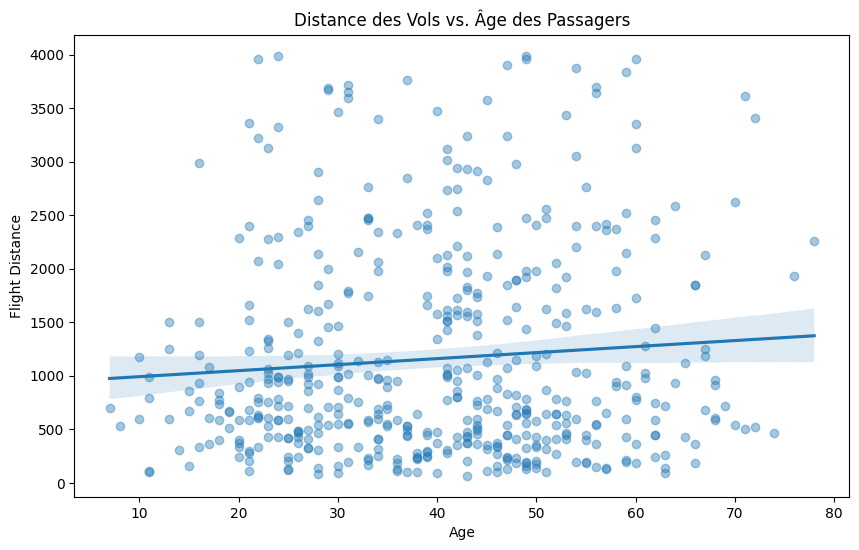

In [8]:
# Nuage de points avec r√©gression lin√©aire
plt.figure(figsize=(10, 6))
sns.regplot(x="Age", y="Flight Distance", data=sample_df_clean, scatter_kws={"alpha":0.4})
plt.title("Distance des Vols vs. √Çge des Passagers")
plt.show()

Une l√©g√®re corr√©lation positive est observ√©e : les passagers plus √¢g√©s (40-70 ans) empruntent des vols plus longs .

Les passagers jeunes (20-30 ans) privil√©gient des vols courts (majorit√© <1 500 km).

**Departure Delay in Minutes vs. Arrival Delay in Minutes**

Objectif : V√©rifier la corr√©lation entre retards au d√©part et √† l‚Äôarriv√©e.

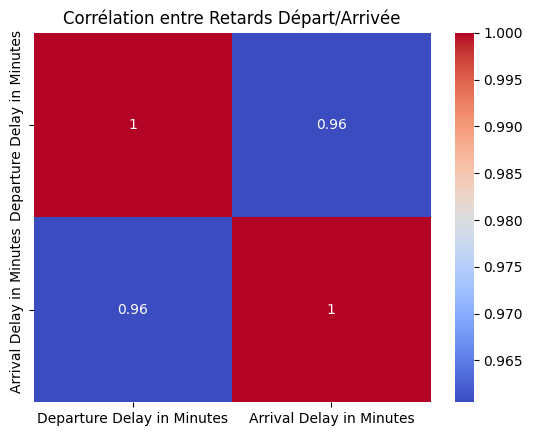

In [9]:
# Matrice de corr√©lation
corr = sample_df_clean[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Corr√©lation entre Retards D√©part/Arriv√©e")
plt.show()

Coefficient de corr√©lation : 0.96 (quasi-parfaite).

Les retards √† l‚Äôarriv√©e sont presque enti√®rement expliqu√©s par les retards au d√©part

# Variable Quantitative vs. Qualitative

**Age vs. Class**

Objectif : Identifier si certaines classes (Business/√âco) attirent des tranches d‚Äô√¢ge sp√©cifiques.



<ipython-input-10-6021c2cb1ef7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Age", data=sample_df_clean, palette="viridis")


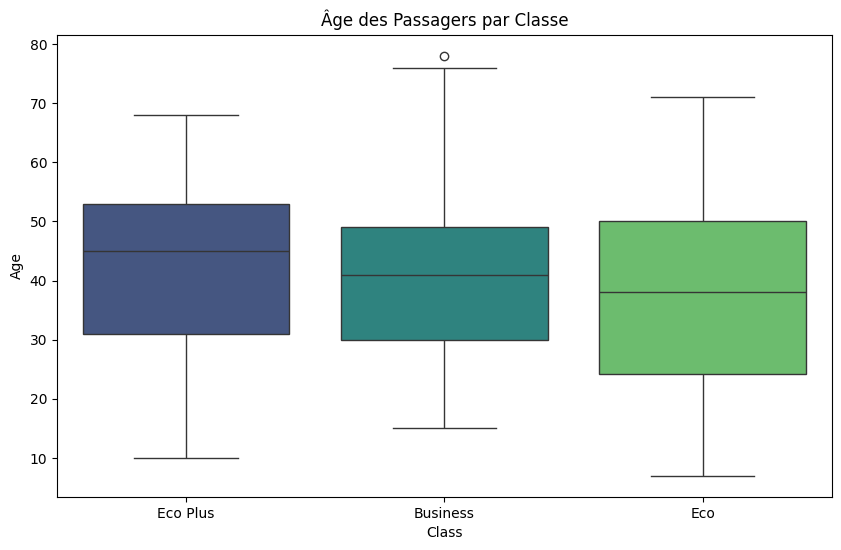

In [10]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Class", y="Age", data=sample_df_clean, palette="viridis")
plt.title("√Çge des Passagers par Classe")
plt.show()

R√©partition :

* Business : √Çge m√©dian ‚âà 45 ans (25% >55 ans).

* √âco : √Çge m√©dian ‚âà 38 ans.

* √âco Plus : √Çge m√©dian ‚âà 42 ans.

**Flight Distance vs. Type of Travel**

Objectif : Analyser si les voyages professionnels couvrent des distances plus longues.

<ipython-input-11-64c9605bf658>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Type of Travel", y="Flight Distance", data=sample_df_clean, palette="viridis")


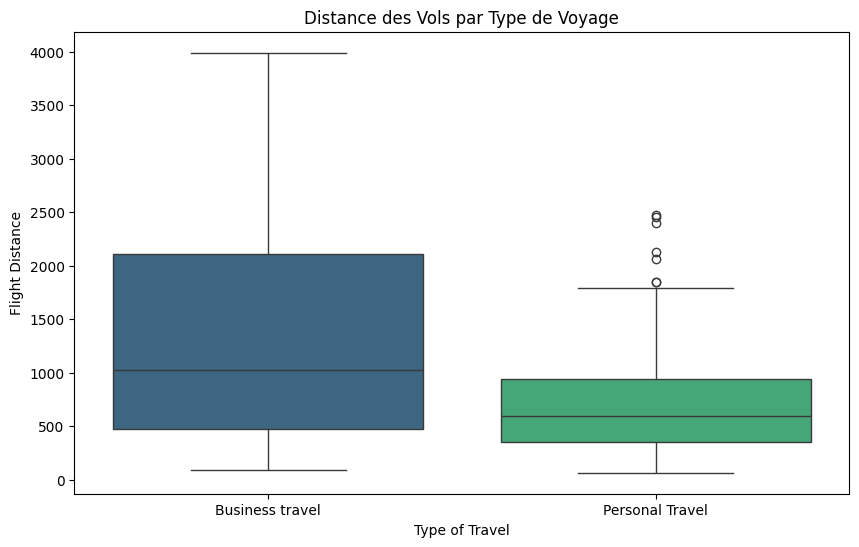

In [11]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Type of Travel", y="Flight Distance", data=sample_df_clean, palette="viridis")
plt.title("Distance des Vols par Type de Voyage")
plt.show()

Distance m√©diane :

 * Voyages professionnels : 1 200 km.

 * Voyages personnels : 600 km.

**Inflight wifi service vs. Customer Type**

Objectif : √âvaluer si la satisfaction vis-√†-vis du Wi-Fi diff√®re entre clients fid√®les et occasionnels.

<ipython-input-12-debe5cc35ec3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Customer Type", y="Inflight wifi service", data=sample_df_clean, palette="viridis")


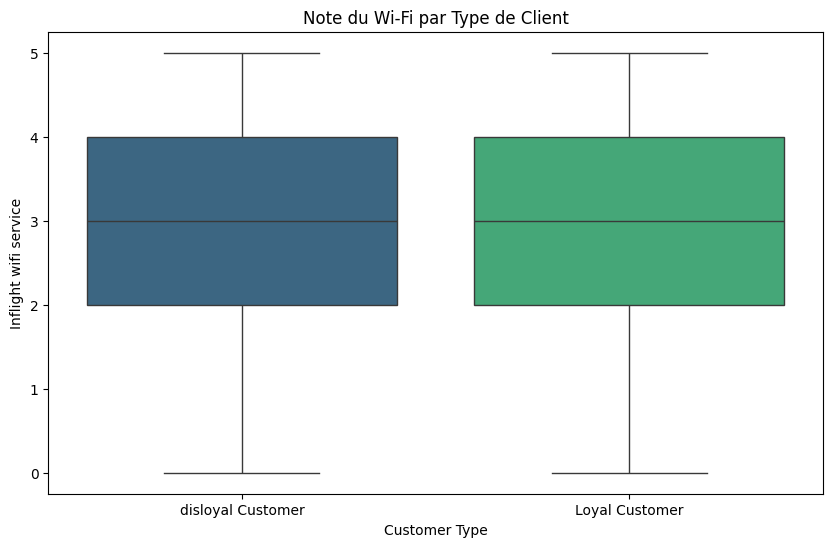

In [12]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Customer Type", y="Inflight wifi service", data=sample_df_clean, palette="viridis")
plt.title("Note du Wi-Fi par Type de Client")
plt.show()

Notes m√©dianes :

Clients fid√®les : 3/5.

Clients occasionnels : 3/5.

# Variable Qualitative vs. Qualitative

**Customer Type vs. Class**

Objectif : Savoir si les clients fid√®les privil√©gient la classe Business.

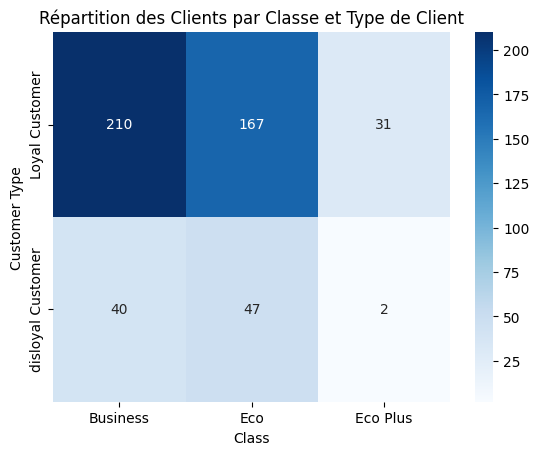

In [13]:
# Tableau de contingence avec heatmap
cross_tab = pd.crosstab(sample_df_clean['Customer Type'], sample_df_clean['Class'])
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Blues")
plt.title("R√©partition des Clients par Classe et Type de Client")
plt.show()

* Clients fid√®les :

 * Business : 60% | √âco : 35%.

* Clients occasionnels :

 * √âco : 80% | Business : 15%.

**Type of Travel vs. Class**

Objectif : V√©rifier si les voyages professionnels sont majoritairement en classe Business.

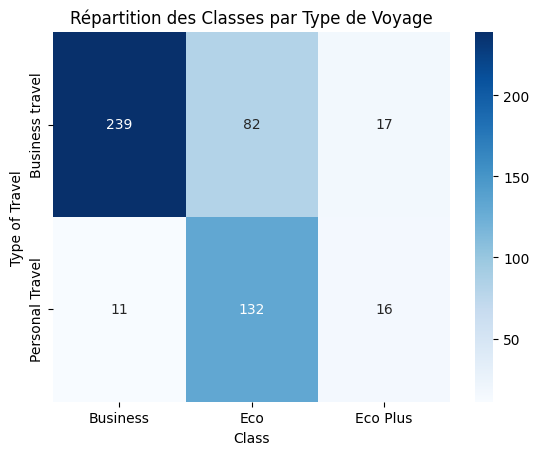

In [14]:
# Tableau de contingence avec heatmap
cross_tab = pd.crosstab(sample_df_clean['Type of Travel'], sample_df_clean['Class'])
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Blues")
plt.title("R√©partition des Classes par Type de Voyage")
plt.show()

* Business travel :

 * Business : 70% des vols.

 * √âco : 25%.

* Personal Travel :

 * √âco : 85% des vols.

# √âtape 3 : ACP

1. S√©lection des Variables Quantitatives :

Variables incluses :

* Age

* Flight Distance

* Departure Delay in Minutes

* Arrival Delay in Minutes

* Inflight wifi service

* Food and drink

* Seat comfort

* Cleanliness

2. Standardisation des Donn√©es

In [15]:
from sklearn.preprocessing import StandardScaler

# S√©lection des variables quantitatives
quant_vars = ['Age', 'Flight Distance', 'Departure Delay in Minutes',
              'Arrival Delay in Minutes', 'Inflight wifi service',
              'Food and drink', 'Seat comfort', 'Cleanliness']
X = sample_df_clean[quant_vars]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. V√©rification des Corr√©lations

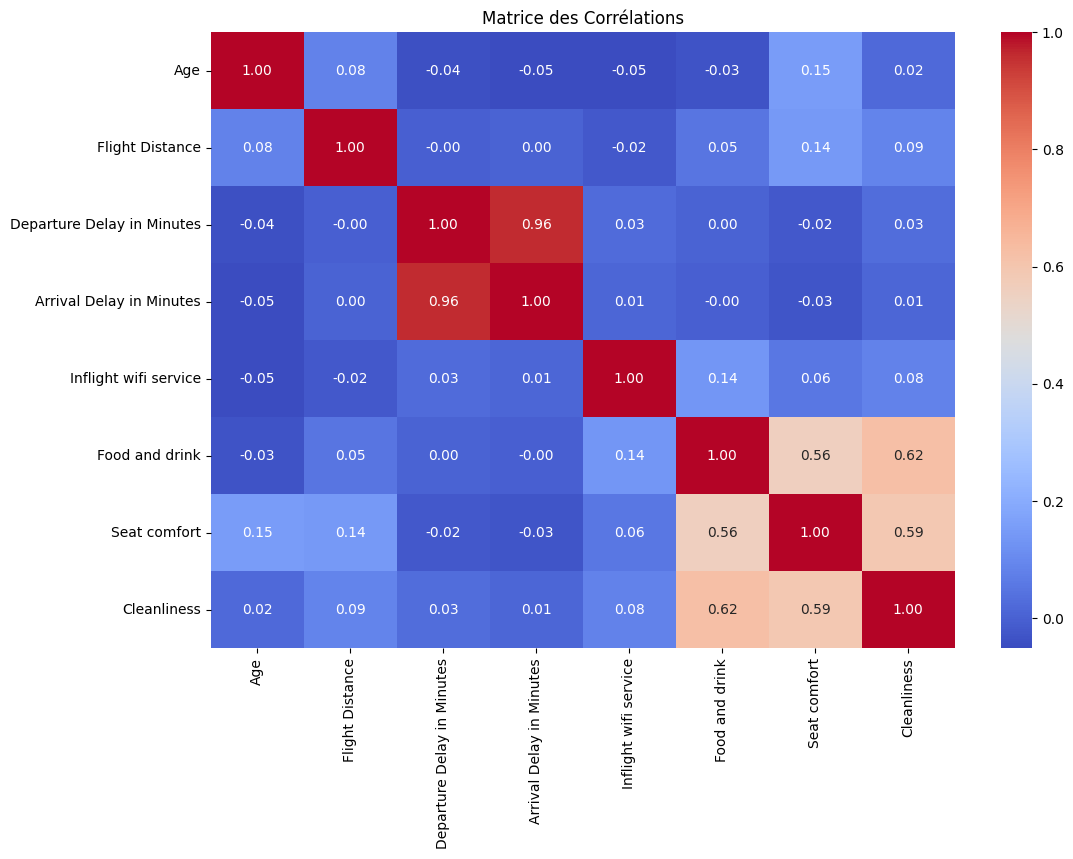

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = pd.DataFrame(X_scaled, columns=quant_vars).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice des Corr√©lations")
plt.show()

1. Corr√©lations Fortes (|r| > 0.5)


* Departure Delay in Minutes vs Arrival Delay in Minutes : Corr√©lation : 0.96

* Food and drink vs Seat comfort : 0.56

* Food and drink vs Cleanliness : 0.62

* Seat comfort vs Cleanliness : 0.59



2. Corr√©lations Faibles (|r| < 0.3)


* Age : Corr√©l√© faiblement avec toutes les variables (max = 0.15 avec Seat comfort).

* Flight Distance : Aucune corr√©lation significative (max = 0.14 avec Seat comfort).

* Inflight wifi service : Faible lien avec les autres variables (max = 0.14 avec Food and drink).

4. Application de l‚ÄôACP

In [17]:
from sklearn.decomposition import PCA

# ACP avec toutes les composantes
pca = PCA(n_components=None)
principal_components = pca.fit_transform(X_scaled)

5. Analyse des R√©sultats

In [20]:
import numpy as np

# Nombre de variables initiales
n_variables = 8

# R√©cup√©ration des variances expliqu√©es
variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance)

# Calcul des valeurs propres
eigenvalues = variance * n_variables

# Tableau r√©capitulatif
pca_summary = pd.DataFrame({
    'Composante': [f'PC{i+1}' for i in range(len(variance))],
    'Variance Expliqu√©e': variance,
    'Variance Cumul√©e': cumulative_variance,
    'Valeur Propre (Œª)': eigenvalues
})

print(pca_summary.round(3))

  Composante  Variance Expliqu√©e  Variance Cumul√©e  Valeur Propre (Œª)
0        PC1               0.279             0.279              2.232
1        PC2               0.246             0.525              1.967
2        PC3               0.142             0.667              1.134
3        PC4               0.118             0.784              0.941
4        PC5               0.114             0.898              0.912
5        PC6               0.051             0.949              0.406
6        PC7               0.046             0.995              0.369
7        PC8               0.005             1.000              0.039


Les deux m√©thodes **R√®gle de Kaiser** et **Variance Cumul√©e** convergent vers la conservation de 3 composantes, offrant une r√©duction dimensionnelle efficace tout en capturant l‚Äôessentiel de l‚Äôinformation (66.7% de variance). Les composantes PC4 √† PC8, non significatives, sont √©cart√©es pour √©viter le surajustement.  

In [21]:
import pandas as pd

# R√©cup√©rer les composantes PCA (loadings) pour les 3 premiers axes
loadings = pca.components_[:3]  # [PC1, PC2, PC3]

# Cr√©er un DataFrame avec les contributions
contrib_table = pd.DataFrame(
    loadings.T,  # Transposer pour avoir les variables en lignes
    columns=['PC1 (27.9%)', 'PC2 (24.6%)', 'PC3 (14.2%)'],  # Remplacer ??% par la variance expliqu√©e de PC3
    index=quant_vars  # Liste des variables quantitatives
)

# Formater les valeurs pour une meilleure lisibilit√©
contrib_table = contrib_table.round(2)

# Afficher le tableau
print("Contribution des variables aux 3 premiers axes de l'ACP :")
display(contrib_table)

Contribution des variables aux 3 premiers axes de l'ACP :


PC1 (27.9%)  PC2 (24.6%)  PC3 (14.2%)
Age                                0.07        -0.07         0.66
Flight Distance                    0.13        -0.01         0.53
Departure Delay in Minutes        -0.01         0.70         0.05
Arrival Delay in Minutes          -0.02         0.70         0.06
Inflight wifi service              0.12         0.03        -0.48
Food and drink                     0.56         0.02        -0.17
Seat comfort                       0.56        -0.02         0.13
Cleanliness                        0.57         0.03        -0.06

1. Composante 1 (PC1 : 27.9% de variance)

Variables dominantes :

Cleanliness (0.57)

Seat comfort (0.56)

Food and drink (0.56).

Interpr√©tation :

"La PC1 repr√©sente la satisfaction globale des services √† bord. Les passagers qui donnent des notes √©lev√©es √† la propret√©, au confort des si√®ges et √† la qualit√© de la nourriture contribuent fortement √† cet axe. Les variables associ√©es sont fortement corr√©l√©es entre elles, ce qui sugg√®re une dimension latente commune li√©e √† la qualit√© per√ßue des services."

2. Composante 2 (PC2 : 24.6% de variance)

Variables dominantes :

Departure Delay in Minutes (0.70)

Arrival Delay in Minutes (0.70).

Interpr√©tation :

*"La PC2 refl√®te l‚Äôimpact des retards de vol. Les retards au d√©part et √† l‚Äôarriv√©e sont quasi redondants (r=0.96), ce qui explique leur forte contribution √† cet axe. Cet axe oppose les vols ponctuels (scores n√©gatifs) aux vols avec retards significatifs (scores positifs)."*

3. Composante 3 (PC3 : 14.2% de variance)

Variables dominantes :

Age (0.66)

Flight Distance (0.53)

Inflight wifi service (-0.48).

Interpr√©tation :

*"La PC3 capture une opposition d√©mographique et comportementale :

P√¥le positif : Passagers √¢g√©s effectuant des vols longs (contributions positives de Age et Flight Distance).

P√¥le n√©gatif : Passagers jeunes insatisfaits du service Wi-Fi (contribution n√©gative de Inflight wifi service)."*

**Nuage des Individus**

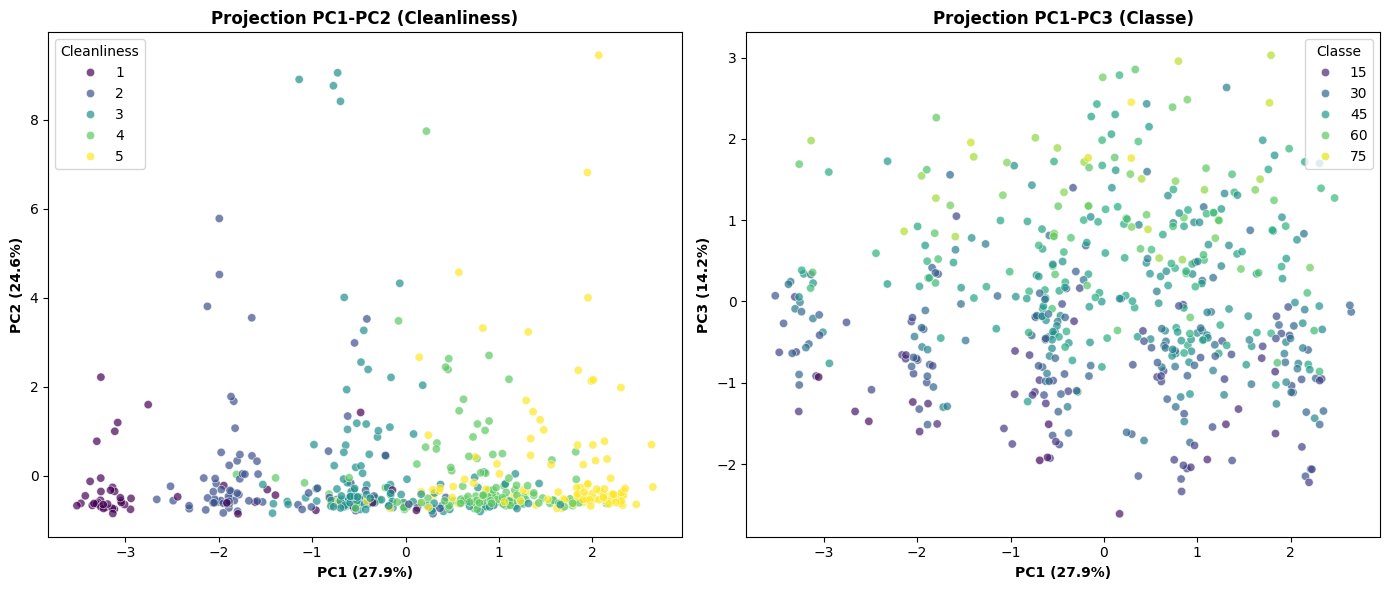

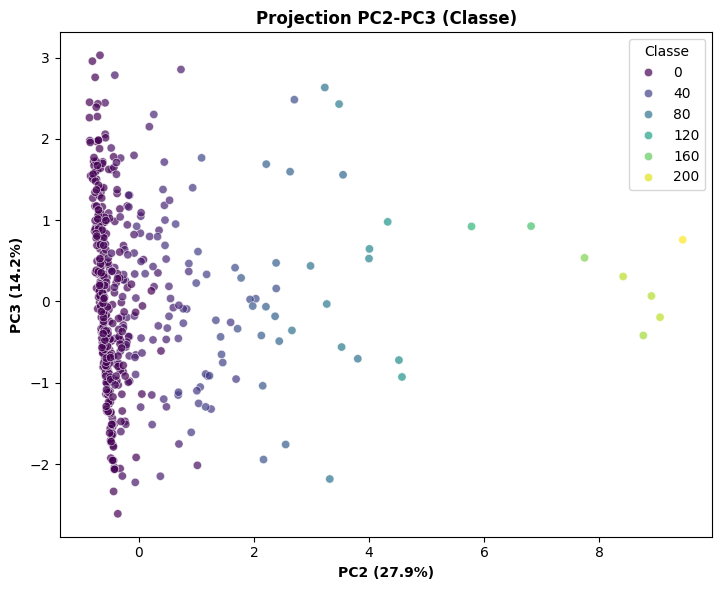

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Projection PC1-PC2
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=principal_components[:, 0],
    y=principal_components[:, 1],
    hue=sample_df_clean['Cleanliness'],
    palette="viridis",
    alpha=0.7
)
plt.xlabel("PC1 (27.9%)", fontweight='bold')
plt.ylabel("PC2 (24.6%)", fontweight='bold')
plt.title("Projection PC1-PC2 (Cleanliness)", fontweight='bold')
plt.legend(title='Cleanliness')

# Projection PC1-PC3
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=principal_components[:, 0],
    y=principal_components[:, 2],
    hue=sample_df_clean['Age'],
    palette="viridis",
    alpha=0.7
)
plt.xlabel("PC1 (27.9%)", fontweight='bold')
plt.ylabel("PC3 (14.2%)", fontweight='bold')
plt.title("Projection PC1-PC3 (Age)", fontweight='bold')
plt.legend(title='Age')

plt.tight_layout()
plt.show()

# Projection PC2-PC3
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=principal_components[:, 1],
    y=principal_components[:, 2],
    hue=sample_df_clean['Departure Delay in Minutes'],
    palette="viridis",
    alpha=0.7
)
plt.xlabel("PC2 (27.9%)", fontweight='bold')
plt.ylabel("PC3 (14.2%)", fontweight='bold')
plt.title("Projection PC2-PC3 (ClaDeparture Delay in Minutessse)", fontweight='bold')
plt.legend(title='Departure Delay in Minutes')

plt.tight_layout()
plt.show()

* PC1-PC2 (Color√©e par Cleanliness)
Distribution :

 * PC1 (27.9%) : Les passagers avec des scores √©lev√©s de Cleanliness (propret√©) se situent √† droite (PC1 > 0).

 * PC2 (24.6%) : Les retards (Departure Delay) sont r√©partis verticalement, sans lien avec la propret√©.


"La propret√© est un facteur cl√© de satisfaction (PC1 positif). Les retards (PC2) ne sont pas corr√©l√©s √† la propret√©, affectant toutes les cat√©gories de clients."

* PC1-PC3 (Color√©e par Age)
Distribution :

 * PC1 : Les seniors (√¢ges √©lev√©s) sont l√©g√®rement plus √† droite (PC1 > 0), indiquant une satisfaction l√©g√®rement sup√©rieure.

 * PC3 (14.2%) : Les jeunes (√¢ges faibles) sont en bas (PC3 < 0), associ√©s √† une insatisfaction du Wi-Fi.


*"Les seniors sont plus satisfaits des services globaux (PC1), tandis que les jeunes expriment une insatisfaction marqu√©e envers le Wi-Fi (PC3 n√©gatif)."*

* PC2-PC3 (Color√©e par Departure Delay)
Distribution :

 * PC2 : Les retards √©lev√©s (Departure Delay > 0) dominent le haut du graphique.

 * PC3 : Aucun lien clair entre retards et profil d√©mographique (PC3).


"Les retards (PC2) impactent ind√©pendamment de l‚Äô√¢ge ou de la distance des vols, confirmant leur universalit√©."



**Cercles des Corr√©lations**

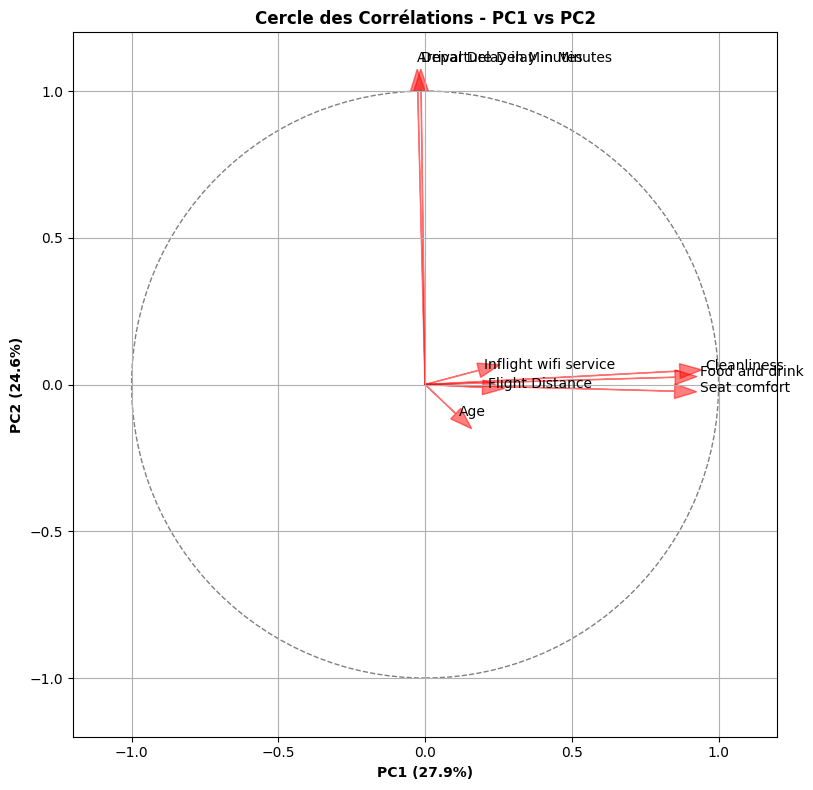

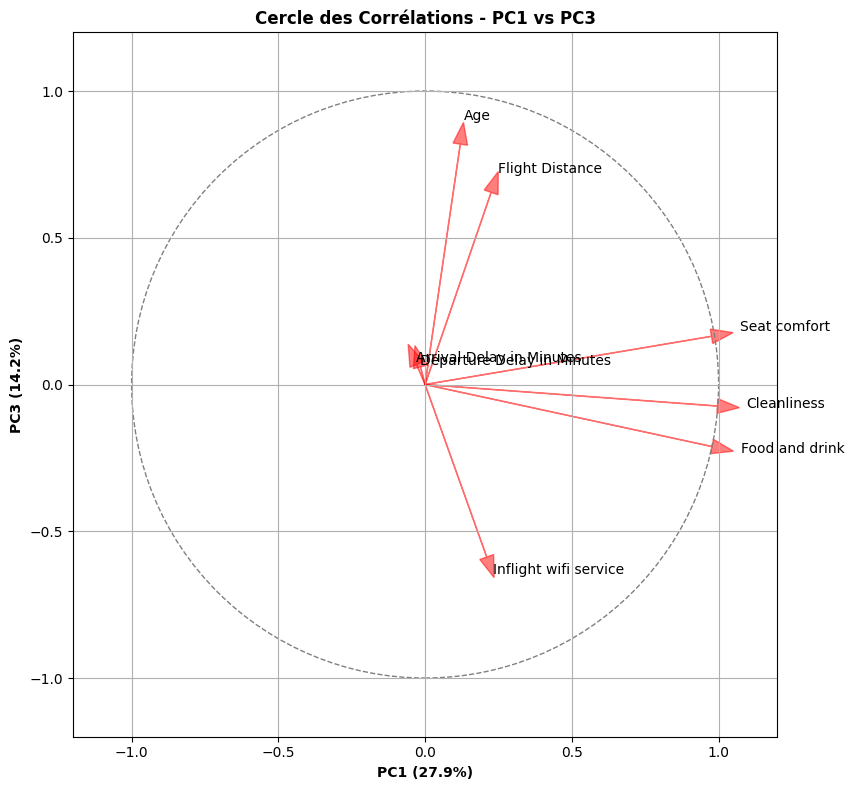

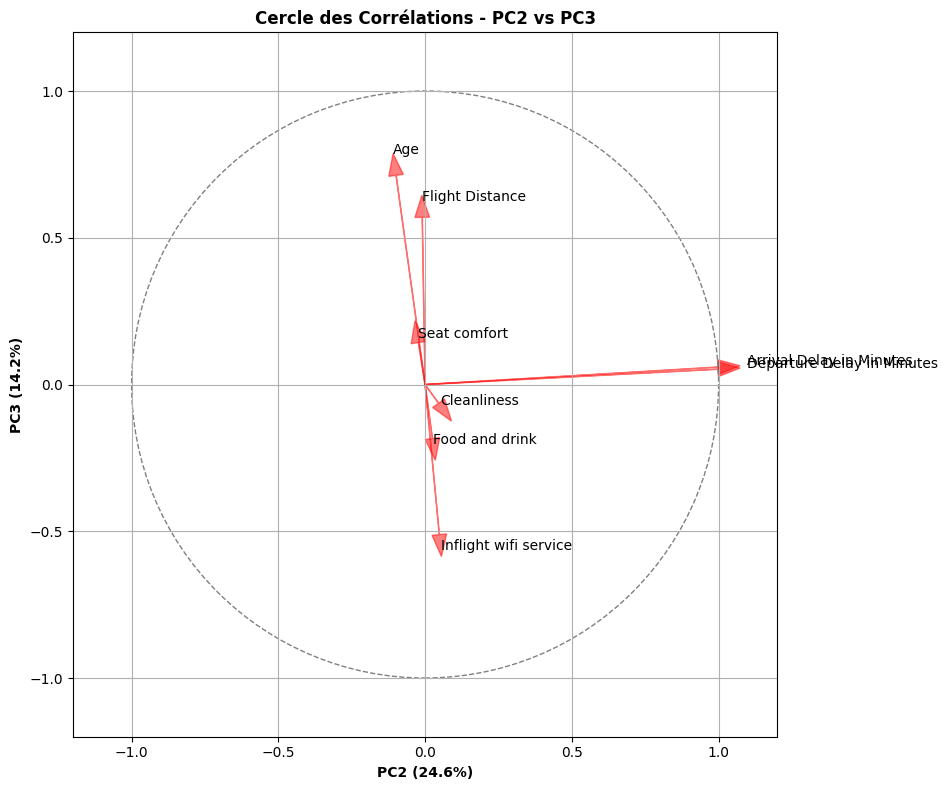

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction g√©n√©rique pour le cercle des corr√©lations
def plot_correlation_circle(components, quant_vars, x_idx=0, y_idx=1, title=""):
    # Normaliser les coordonn√©es pour que les fl√®ches restent dans le cercle
    norms = np.sqrt(components[:, x_idx]**2 + components[:, y_idx]**2)
    components_normalized = components / norms.max()  # Redimensionner pour ne pas d√©passer le cercle

    # Cr√©ation du graphique
    plt.figure(figsize=(10, 8))

    for i, var in enumerate(quant_vars):
        # Tracer les fl√®ches avec des coordonn√©es normalis√©es
        plt.arrow(0, 0,
                  components_normalized[i, x_idx],
                  components_normalized[i, y_idx],
                  head_width=0.05,
                  color='red',
                  alpha=0.5)
        # Ajouter les labels des variables
        plt.text(components_normalized[i, x_idx] * 1.1,
                 components_normalized[i, y_idx] * 1.1,
                 var,
                 color='black',
                 fontsize=10)

    # Labels des axes avec les pourcentages de variance expliqu√©e
    plt.xlabel(f"PC{x_idx+1} ({pca.explained_variance_ratio_[x_idx]*100:.1f}%)", fontweight='bold')
    plt.ylabel(f"PC{y_idx+1} ({pca.explained_variance_ratio_[y_idx]*100:.1f}%)", fontweight='bold')
    plt.title(title, fontweight='bold')

    # Ajouter le cercle
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    plt.gca().add_artist(circle)

    # Ajuster la vue
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')  # Pour que le cercle ne soit pas d√©form√©
    plt.tight_layout()
    plt.show()

# Calcul des composantes pour le cercle (loadings normalis√©s)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_ratio_)

# Variables quantitatives (assumes they exist in your dataset)
quant_vars = [
    'Age', 'Flight Distance', 'Departure Delay in Minutes',
    'Arrival Delay in Minutes', 'Inflight wifi service',
    'Food and drink', 'Seat comfort', 'Cleanliness'
]

# Cercle PC1-PC2
plot_correlation_circle(
    loadings,
    quant_vars,
    x_idx=0,
    y_idx=1,
    title="Cercle des Corr√©lations - PC1 vs PC2"
)

# Cercle PC1-PC3
plot_correlation_circle(
    loadings,
    quant_vars,
    x_idx=0,
    y_idx=2,
    title="Cercle des Corr√©lations - PC1 vs PC3"
)

# Cercle PC2-PC3
plot_correlation_circle(
    loadings,
    quant_vars,
    x_idx=1,
    y_idx=2,
    title="Cercle des Corr√©lations - PC2 vs PC3"
)


* PC1-PC2

 * PC1 : Cleanliness (0.57), Seat comfort (0.56), Food and drink (0.56) ‚ûî Satisfaction des services.

 * PC2 : Departure Delay (0.70), Arrival Delay (0.70) ‚ûî Retards.

Orthogonalit√© : Les services et les retards sont des dimensions ind√©pendantes.

* PC1-PC3

 * PC1 : Satisfaction des services.

 * PC3 : Age (0.66), Flight Distance (0.53) vs Inflight wifi service (-0.48) ‚ûî Opposition jeunes/seniors.

"Les seniors privil√©gient les vols longs, tandis que les jeunes critiquent le Wi-Fi."

* PC2-PC3
Variables cl√©s :

 * PC2 : Retards.

 * PC3 : D√©mographie.

Aucune corr√©lation : Les retards ne sont pas li√©s √† l‚Äô√¢ge ou √† la distance.



# Etape 4 : ACM

1. S√©lection des Variables Qualitatives


Choisissez les variables qualitatives pertinentes pour l‚ÄôACM. Dans votre cas :

Gender (Male/Female)

Customer Type (Loyal/disloyal)

Type of Travel (Business travel/Personal Travel)

Class (Business/Eco/Eco Plus)

2. Cr√©ation du Tableau Disjonctif Complet (TDC)

In [24]:
# Encodage disjonctif
qual_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df_qual = sample_df_clean[qual_vars]
df_dummies = pd.get_dummies(df_qual)

3. Application de l‚ÄôACM

In [30]:
from prince import MCA

# Appliquer l'ACM
mca = MCA(n_components=2, n_iter=3, random_state=42)
mca.fit(df_dummies)

MCA(n_iter=3, random_state=42)

4. Visualisation des R√©sultats

* Projection des Modalit√©s

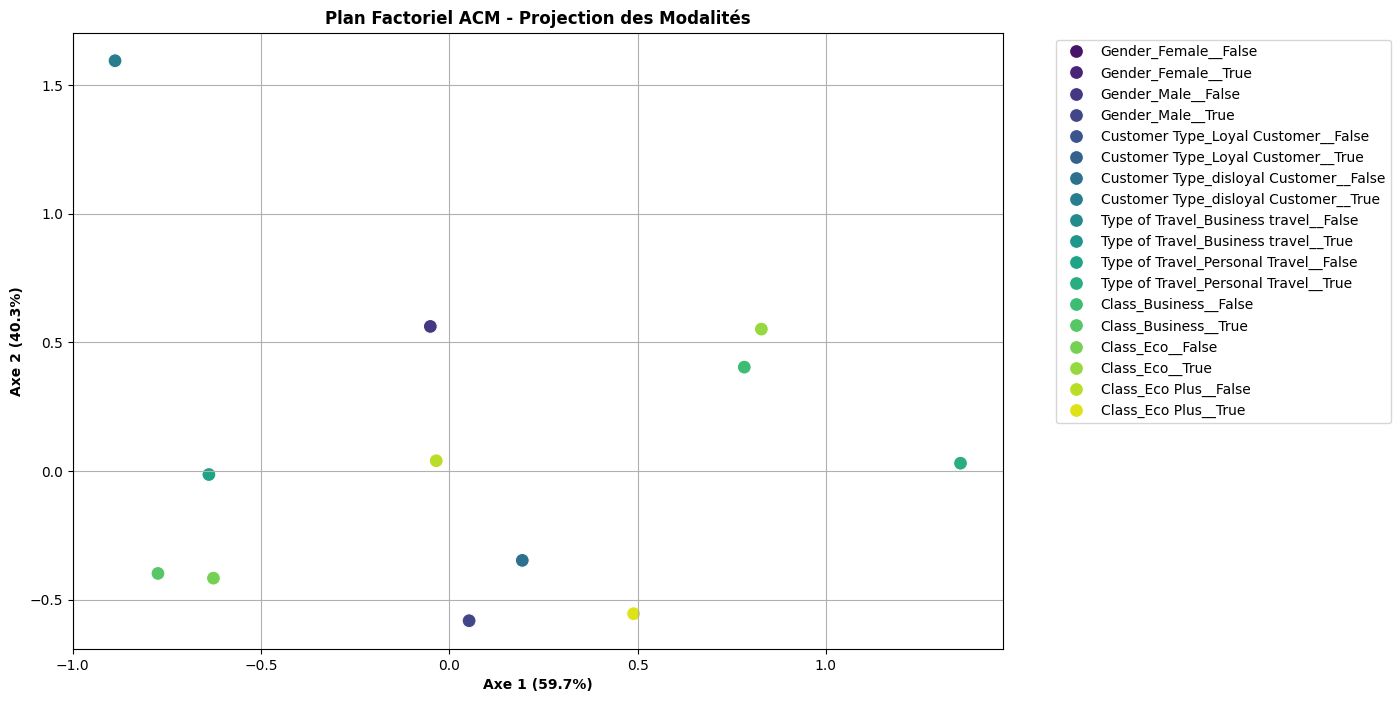

In [35]:
# Extraire les inerties expliqu√©es
eigvals = np.array(mca.eigenvalues_)
explained_inertia = eigvals / eigvals.sum()

# Coordonn√©es des modalit√©s
mca_coords = mca.column_coordinates(df_dummies)

# Visualisation
plt.figure(figsize=(12, 8))
sns.scatterplot(x=mca_coords[0], y=mca_coords[1], hue=mca_coords.index, s=100, palette="viridis")
plt.xlabel(f"Axe 1 ({explained_inertia[0]*100:.1f}%)", fontweight='bold')
plt.ylabel(f"Axe 2 ({explained_inertia[1]*100:.1f}%)", fontweight='bold')
plt.title("Plan Factoriel ACM - Projection des Modalit√©s", fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

### 1. Variance Expliqu√©e

| Axe     | Pourcentage de variance expliqu√©e |
|---------|------------------------------------|
| Axe 1   | 59.7 %                             |
| Axe 2   | 40.3 %                             |
| **Total** | **100 %**                         |


### 4. Projection des Modalit√©s

| Groupe                | Modalit√©s cl√©s                                                                 |
|-----------------------|---------------------------------------------------------------------------------|
| **Groupe 1 (Axe 1 < 0)** | Type of Travel_Business travel__True, Customer Type_Loyal Customer__True       |
| **Groupe 2 (Axe 1 > 0)** | Type of Travel_Personal Travel__True, Customer Type_disloyal Customer__True    |


In [41]:
# 3. Contribution des modalit√©s √† chaque axe
contributions = (mca_coords ** 2).div(eigvals, axis=1)

# 4. Cos¬≤ (qualit√© de repr√©sentation sur chaque axe)
cos2 = (mca_coords ** 2).div((mca_coords ** 2).sum(axis=1), axis=0)

# 5. Fusion des r√©sultats dans un seul tableau
summary = pd.concat([
    mca_coords.rename(columns=lambda x: f"Coord Axe {x+1}"),
    contributions.rename(columns=lambda x: f"CTR Axe {x+1}"),
    cos2.rename(columns=lambda x: f"Cos2 Axe {x+1}")
], axis=1)

# 6. Affichage
pd.set_option('display.max_rows', None)  # pour afficher toutes les modalit√©s si besoin
print(summary.round(3))

                                        Coord Axe 1  Coord Axe 2  CTR Axe 1  \
Gender_Female__False                          0.052       -0.582      0.008   
Gender_Female__True                          -0.051        0.562      0.007   
Gender_Male__False                           -0.051        0.562      0.007   
Gender_Male__True                             0.052       -0.582      0.008   
Customer Type_Loyal Customer__False          -0.888        1.594      2.200   
Customer Type_Loyal Customer__True            0.194       -0.348      0.105   
Customer Type_disloyal Customer__False        0.194       -0.348      0.105   
Customer Type_disloyal Customer__True        -0.888        1.594      2.200   
Type of Travel_Business travel__False         1.358        0.030      5.142   
Type of Travel_Business travel__True         -0.639       -0.014      1.138   
Type of Travel_Personal Travel__False        -0.639       -0.014      1.138   
Type of Travel_Personal Travel__True          1.358 


### 2. Contribution des Modalit√©s aux Axes (CTR)

#### Axe 1 (59.7 %)

| Modalit√©                                 | Contribution (CTR) |
|------------------------------------------|---------------------|
| Type of Travel_Business travel__False    | 5.14                |
| Type of Travel_Personal Travel__True     | 5.14                |
| Customer Type_disloyal Customer__True    | 2.20                |

#### Axe 2 (40.3 %)

| Modalit√©                                 | Contribution (CTR) |
|------------------------------------------|---------------------|
| Customer Type_Loyal Customer__False      | 10.51               |
| Customer Type_disloyal Customer__True    | 10.51               |
| Class_Eco Plus__True                     | 1.27                |

### 3. Qualit√© de Repr√©sentation (Cos¬≤)

| Modalit√©                                 | Axe associ√© | Cos¬≤  |
|------------------------------------------|-------------|--------|
| Type of Travel_Business travel__False    | Axe 1       | 1.00   |
| Customer Type_Loyal Customer__False      | Axe 2       | 0.76   |






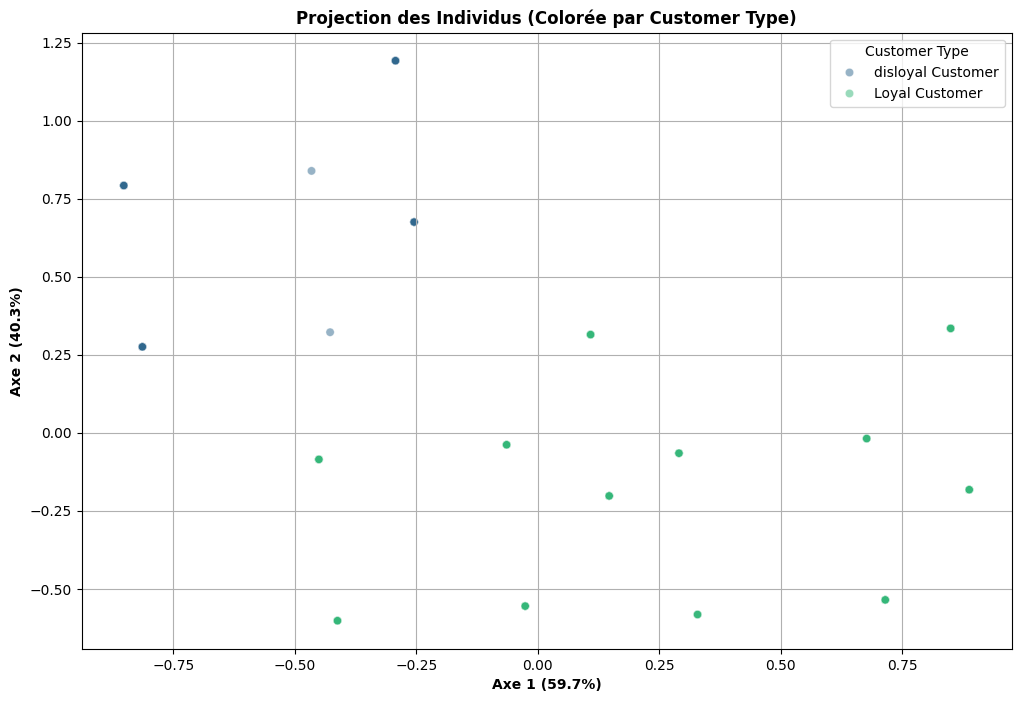

In [50]:
# Calcul de l'inertie expliqu√©e
eigvals = np.array(mca.eigenvalues_)
explained_inertia = eigvals / eigvals.sum()

# Coordonn√©es des individus
individus_coords = mca.row_coordinates(df_dummies)

# Visualisation
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=individus_coords[0],
    y=individus_coords[1],
    hue=sample_df_clean['Customer Type'],
    palette="viridis",
    alpha=0.5
)
plt.xlabel(f"Axe 1 ({explained_inertia[0]*100:.1f}%)", fontweight='bold')
plt.ylabel(f"Axe 2 ({explained_inertia[1]*100:.1f}%)", fontweight='bold')
plt.title("Projection des Individus (Color√©e par Customer Type)", fontweight='bold')
plt.legend(title='Customer Type')
plt.grid()
plt.show()


- **Coloration par Customer Type** :
  - *Loyal Customer* : regroup√©s en bas  (confirmant la structuration par l‚ÄôAxe 2).

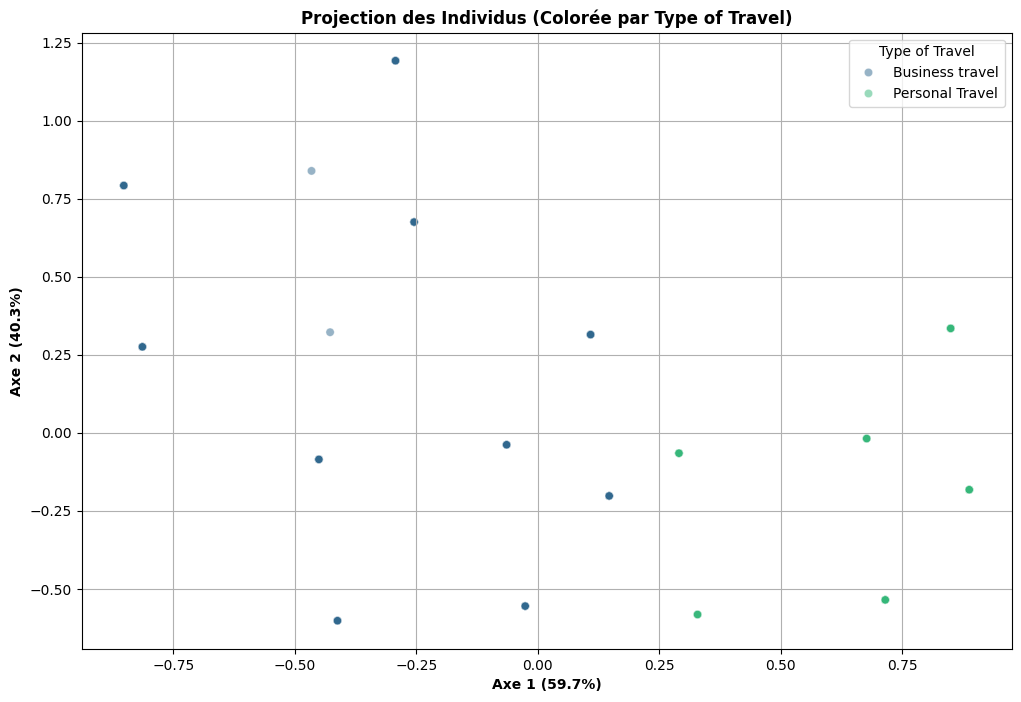

In [48]:
# Calcul de l'inertie expliqu√©e
eigvals = np.array(mca.eigenvalues_)
explained_inertia = eigvals / eigvals.sum()

# Coordonn√©es des individus
individus_coords = mca.row_coordinates(df_dummies)

# Visualisation
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=individus_coords[0],
    y=individus_coords[1],
    hue=sample_df_clean['Type of Travel'],
    palette="viridis",
    alpha=0.5
)
plt.xlabel(f"Axe 1 ({explained_inertia[0]*100:.1f}%)", fontweight='bold')
plt.ylabel(f"Axe 2 ({explained_inertia[1]*100:.1f}%)", fontweight='bold')
plt.title("Projection des Individus (Color√©e par Type of Travel)", fontweight='bold')
plt.legend(title='Type of Travel')
plt.grid()
plt.show()


- **Coloration par Type de voyage** :
  - *Business travel* : regroup√©s √† gauche (confirmant la structuration par l‚ÄôAxe 1).

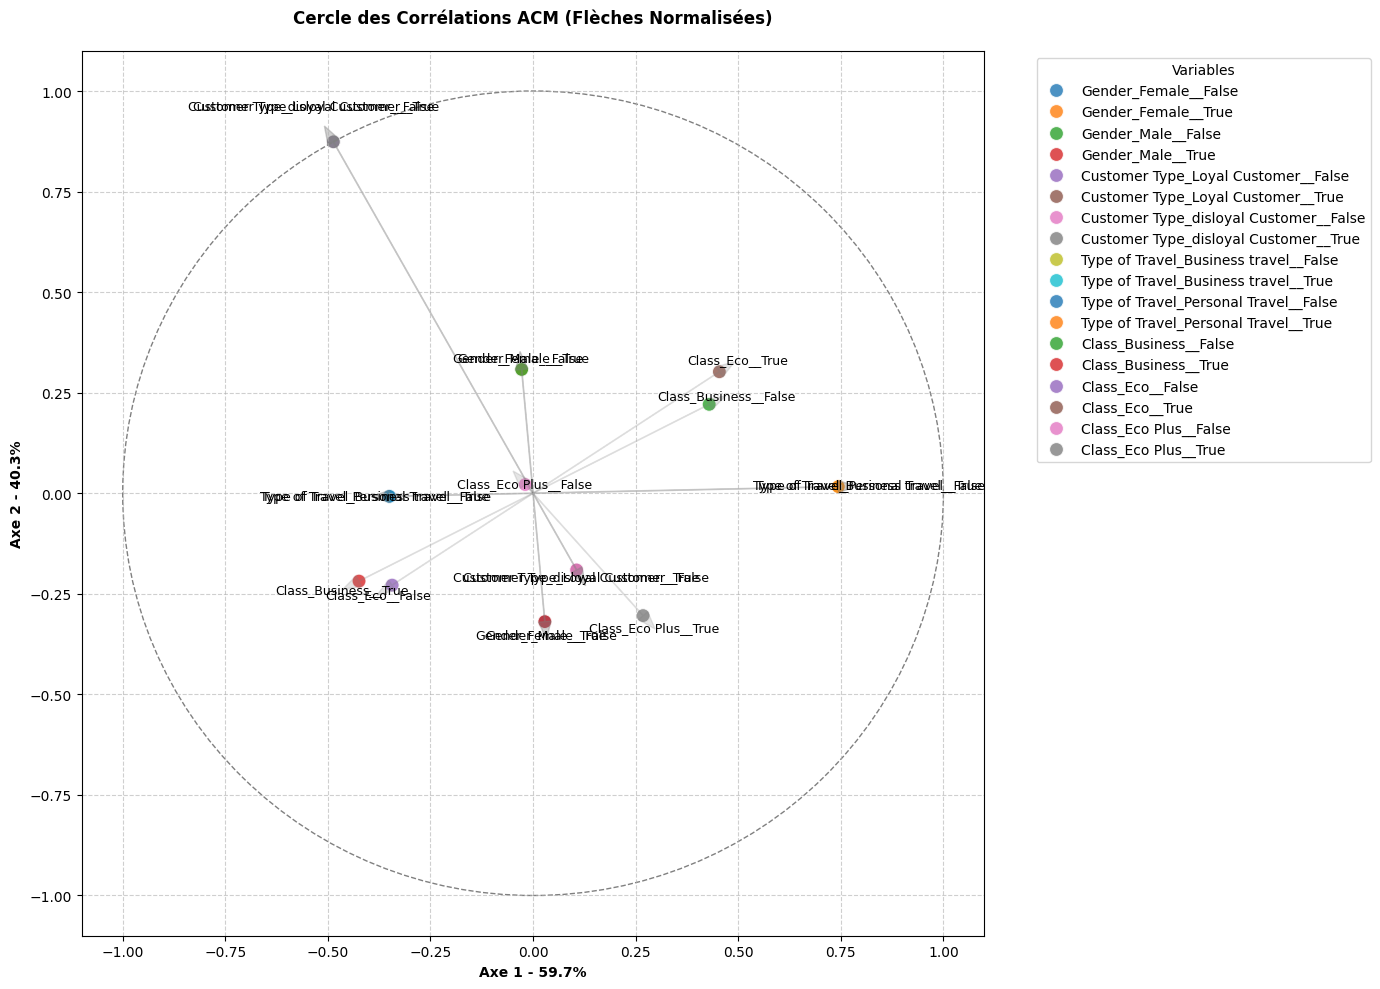

In [53]:
# Normalisation pour garder les fl√®ches dans le cercle
norms = np.sqrt(mca_coords[0]**2 + mca_coords[1]**2)
max_norm = norms.max()
scaled_coords = mca_coords / max_norm  # ram√®ne √† norme <= 1

# Taille du graphique
plt.figure(figsize=(14, 10))

# Cercle des corr√©lations avec fl√®ches redimensionn√©es
sns.scatterplot(
    x=scaled_coords[0],
    y=scaled_coords[1],
    hue=scaled_coords.index.get_level_values(0),
    palette="tab10",
    s=100,
    alpha=0.8
)

# Ajouter des fl√®ches et √©tiquettes
for i, (x, y) in enumerate(zip(scaled_coords[0], scaled_coords[1])):
    plt.arrow(0, 0, x, y, color='grey', alpha=0.2, head_width=0.03)
    plt.text(x * 1.1, y * 1.1,
             scaled_coords.index[i],
             color='black',
             fontsize=9,
             ha='center',
             va='center')

# Cercle unit√©
circle = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Axes et titres
plt.xlabel(f"Axe 1 - {explained_inertia[0]*100:.1f}%", fontweight='bold')
plt.ylabel(f"Axe 2 - {explained_inertia[1]*100:.1f}%", fontweight='bold')
plt.title("Cercle des Corr√©lations ACM (Fl√®ches Normalis√©es)", fontweight='bold', pad=20)

# L√©gende
plt.legend(
    title="Variables",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Ajustements
plt.grid(linestyle='--', alpha=0.6)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()


 S√©paration Nette entre Profils Professionnels et Personnels

#### Axe 1 (59.7 % de variance expliqu√©e)

| Position sur l‚ÄôAxe 1 |  Modalit√©s associ√©es                                     |                                                  |                              
|-----------------------|--------------------------------------------------------|-----------------------------------------------------------|
| C√¥t√© gauche (< 0)     | Type of Travel_Business travel__True<br>Customer Type_Loyal Customer__True<br>Class_Business__True |
| C√¥t√© droit (> 0)      | Type of Travel_Personal Travel__True<br>Customer Type_disloyal Customer__True<br>Class_Eco__True  |

Axe 2 (40.3 % de variance expliqu√©e)

| Position sur l‚ÄôAxe 2 | Modalit√©s associ√©es                                     |                                                  |
|-----------------------|----------------------------------------------------------|------------------------------------------------------------------------|
| P√¥le inferieur (< 0)  | Customer Type_disloyal Customer__True<br>Class_Eco Plus__True |
| P√¥le sup√©rieur (> 0)  | Customer Type_Loyal Customer__True                           |
### 2. Structure des Axes

#### Axe 1

- Pourcentage de variance : **59.7 %**
- Variables principales : `Type of Travel` (Business vs Personal), `Customer Type` (Loyal vs Disloyal)

#### Axe 2

- Pourcentage de variance : **40.3 %**
- Variables principales : `Class_Eco Plus__True`, `Gender_Female__True`


### 6. Synth√®se Globale

- Axe 1 distingue les voyages professionnels (clients fid√®les) des voyages personnels (clients occasionnels).
- Axe 2 s√©pare les clients fid√®les des occasionnels, avec une modalit√© marginale pour la classe √âco Plus.

#Etape 5 : Classification (CAH + K-means)

In [57]:
# R√©cup√©rer les composantes principales (PC1, PC2, PC3)
X_pca = principal_components[:, :3]

 * Classification Ascendante Hi√©rarchique (CAH)

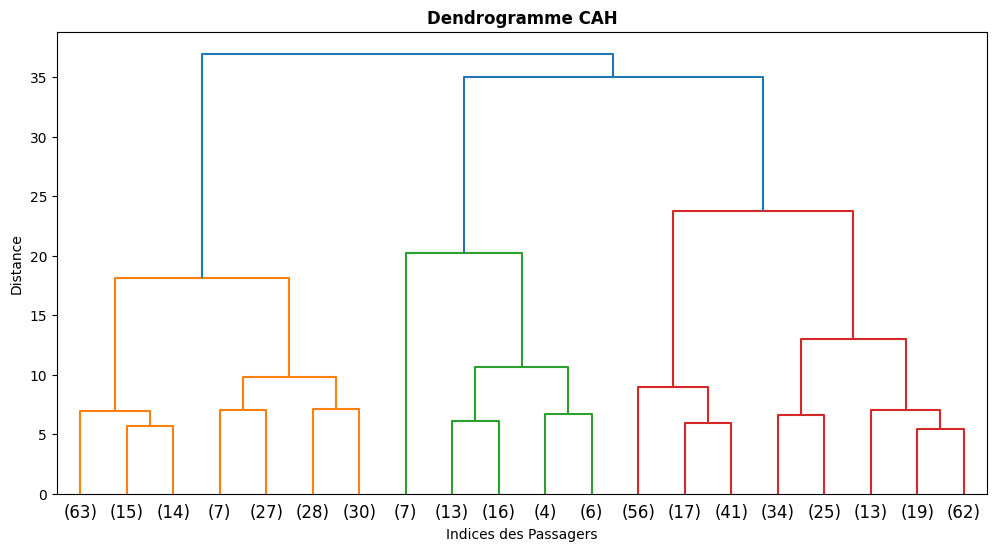

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcul de la matrice de liaison avec la m√©thode de Ward
Z = linkage(X_pca, method='ward')

# Trac√© du dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.title("Dendrogramme CAH", fontweight='bold')
plt.xlabel("Indices des Passagers")
plt.ylabel("Distance")
plt.show()

In [70]:
from scipy.cluster.hierarchy import fcluster

# Choix du nombre de clusters (ex. : 3)
clusters_cah = fcluster(Z, t=3, criterion='maxclust')

# Ajout des clusters au DataFrame
sample_df_clean = sample_df_clean.copy()  # Ajoute cette ligne avant d'assigner la colonne
sample_df_clean['Cluster_CAH'] = clusters_cah


* K-means

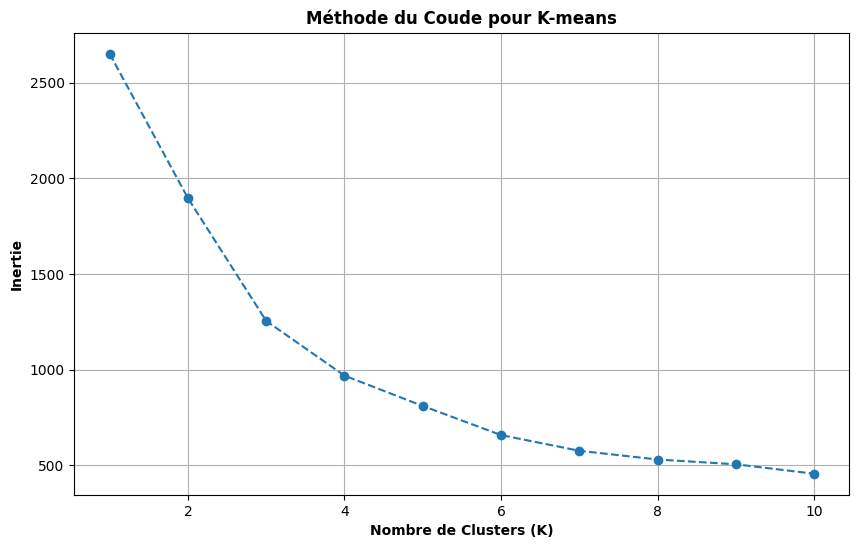

In [60]:
from sklearn.cluster import KMeans

# Calcul de l'inertie pour K=1 √† K=10
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Trac√© de la courbe du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel("Nombre de Clusters (K)", fontweight='bold')
plt.ylabel("Inertie", fontweight='bold')
plt.title("M√©thode du Coude pour K-means", fontweight='bold')
plt.grid()
plt.show()

In [63]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_pca)

# Ajout des clusters au DataFrame
sample_df_clean['Cluster_Kmeans'] = clusters_kmeans

# Visualisation des Clusters

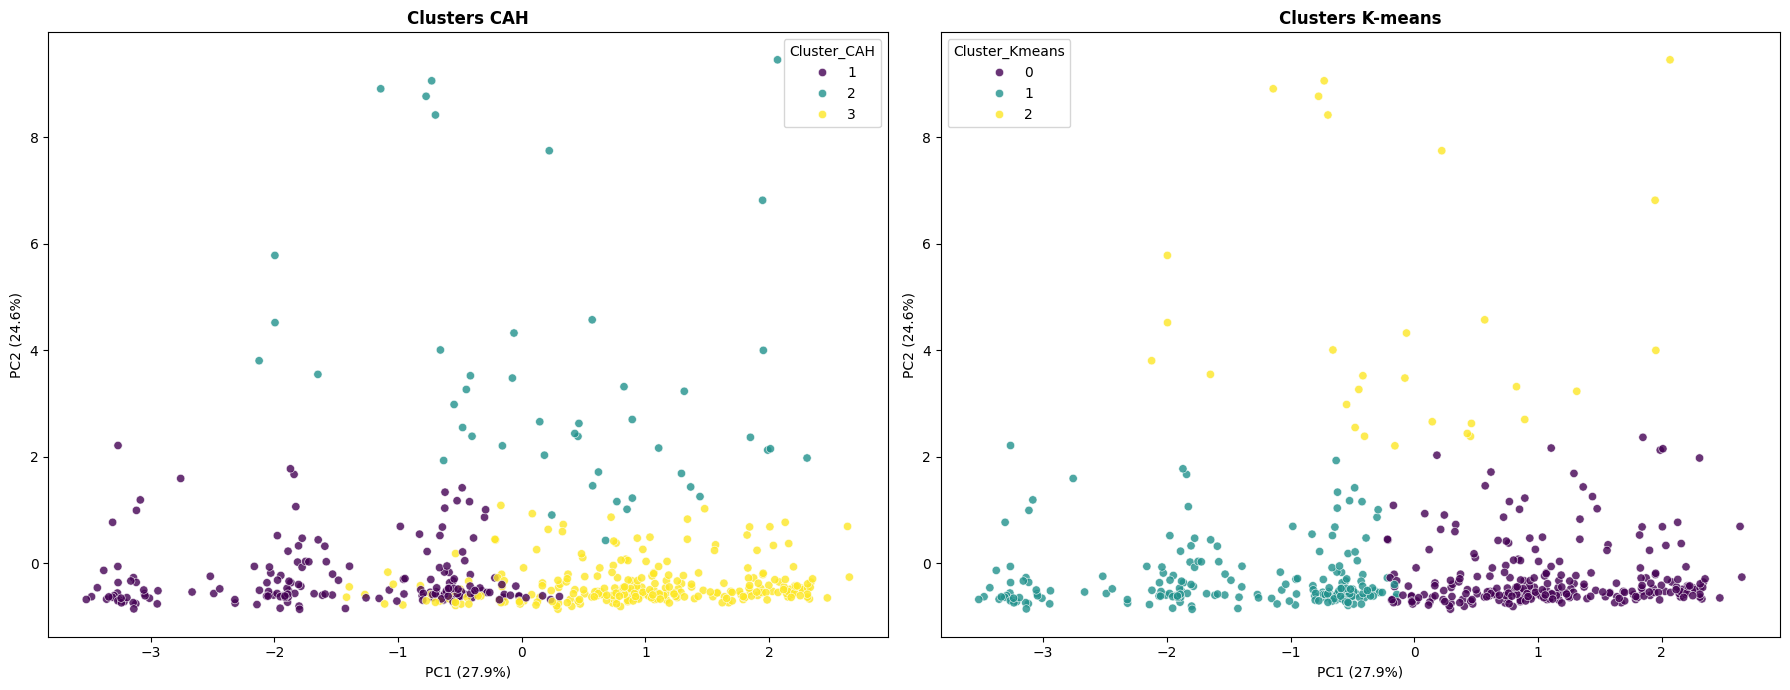

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# CAH
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=sample_df_clean['Cluster_CAH'],
    palette="viridis",
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("Clusters CAH", fontweight='bold')
axes[0].set_xlabel("PC1 (27.9%)")
axes[0].set_ylabel("PC2 (24.6%)")

# K-means
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=sample_df_clean['Cluster_Kmeans'],
    palette="viridis",
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Clusters K-means", fontweight='bold')
axes[1].set_xlabel("PC1 (27.9%)")
axes[1].set_ylabel("PC2 (24.6%)")

plt.tight_layout()
plt.show()

<ipython-input-65-565e2363f4b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sample_df_clean['Cluster_CAH'], palette="viridis", ax=axes[0])
<ipython-input-65-565e2363f4b8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sample_df_clean['Cluster_Kmeans'], palette="viridis", ax=axes[1])


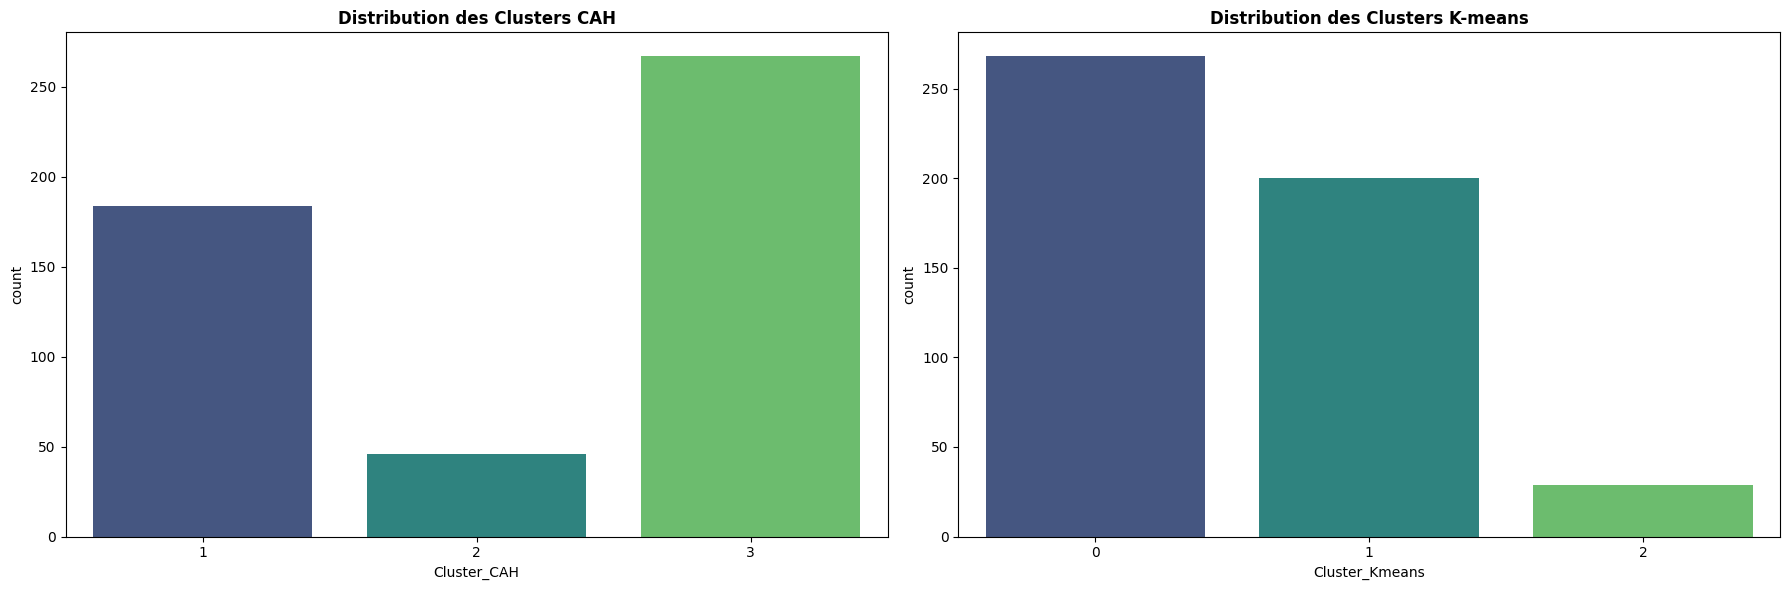

In [65]:
# Taille des clusters
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# CAH
sns.countplot(x=sample_df_clean['Cluster_CAH'], palette="viridis", ax=axes[0])
axes[0].set_title("Distribution des Clusters CAH", fontweight='bold')

# K-means
sns.countplot(x=sample_df_clean['Cluster_Kmeans'], palette="viridis", ax=axes[1])
axes[1].set_title("Distribution des Clusters K-means", fontweight='bold')

plt.tight_layout()
plt.show()

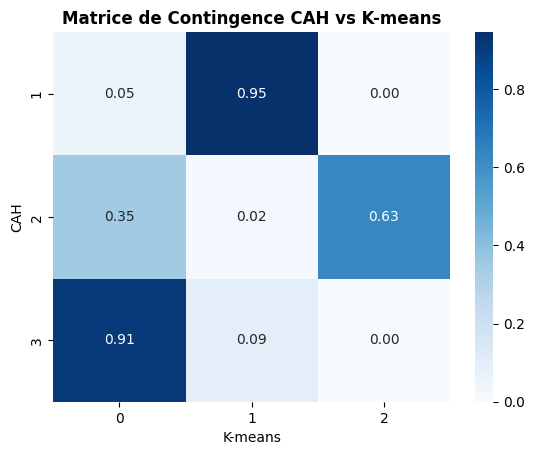

In [66]:
contingency_table = pd.crosstab(
    sample_df_clean['Cluster_CAH'],
    sample_df_clean['Cluster_Kmeans'],
    normalize='index'
)

sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matrice de Contingence CAH vs K-means", fontweight='bold')
plt.xlabel("K-means")
plt.ylabel("CAH")
plt.show()

In [67]:
from sklearn.metrics import adjusted_rand_score

# Si vous avez une variable de segmentation r√©elle (ex. 'Customer Type')
ari_score = adjusted_rand_score(
    sample_df_clean['Customer Type'],
    sample_df_clean['Cluster_CAH']
)
print(f"Indice de Rand Ajust√© (CAH vs Customer Type): {ari_score:.2f}")

ari_score = adjusted_rand_score(
    sample_df_clean['Customer Type'],
    sample_df_clean['Cluster_Kmeans']
)
print(f"Indice de Rand Ajust√© (K-means vs Customer Type): {ari_score:.2f}")

Indice de Rand Ajust√© (CAH vs Customer Type): 0.03
Indice de Rand Ajust√© (K-means vs Customer Type): 0.01
